# For Exponential Fit with Confidence Interval

In [ ]:
# Date of saving the final script: 10-04-2024
# Data File name:'09042024_all_NACC_new_normalization_Without_NACCID_but_SubjectID.xlsx
# Created by: NIBR   ##(NY)
# created for:TP revision Manuscript tracking # 2023TP001189R

In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn  as sns
import matplotlib.pyplot as plt

from matplotlib import rc, rcParams

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import openpyxl
from PIL import Image
import io

from statsmodels.formula.api import ols 

import scipy.optimize
from scipy.optimize import curve_fit

C:\Users\Neha Yadav\AppData\Local\Temp\ipykernel_25444\3060363426.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
# for installing kapteyn package 3.4 with python usinging anaconda 
# open anaconda terminal then use below command
#> pip install https://www.astro.rug.nl/software/kapteyn/kapteyn-3.4.tar.gz
## for more in formation on kapteyn : https://www.astro.rug.nl/software/kapteyn/intro.html

In [3]:
from pylab import *
from kapteyn import kmpfit

In [4]:
os.chdir(r'D:/Translation psychiatry/Revision_10-2-2024/Manuscript_revision_resubmission_09042024/Codes_and_files')
os.getcwd()

'D:\\Translation psychiatry\\Revision_10-2-2024\\Manuscript_revision_resubmission_09042024\\Codes_and_files'

In [5]:
df=pd.read_excel("09042024_all_NACC_new_normalization_Without_NACCID_but_SubjectID.xlsx")
df

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,542.478964,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1
1,1,79,1395.502,968.750,395.280,588.131,380.619,31.4715,5.5533,27.8294,...,574.489916,371.790940,30.741551,5.424497,27.183926,CN,2.37385,1.50950,65-79,0
2,2,64,1440.846,1152.588,286.419,648.068,504.520,1.8389,6.4687,13.5215,...,641.494636,499.402645,1.820248,6.403088,13.384351,CN,4.52340,2.45655,50-64,0
3,2,67,1397.713,1115.268,280.659,625.017,490.251,1.7864,6.3123,13.6619,...,609.554620,478.122614,1.742206,6.156139,13.323916,CN,4.29875,2.19155,65-79,0
4,3,76,1323.530,1009.560,313.970,602.200,407.360,0.0000,5.8200,32.2800,...,620.219995,419.549680,0.000000,5.994155,33.245934,CN,3.48500,1.75500,65-79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,1864,70,1249.960,953.880,294.830,556.760,397.120,1.2500,6.1800,14.0600,...,607.170570,433.076329,1.363178,6.739554,15.333031,CN,4.02500,2.38500,65-79,0
2638,1865,68,1279.144,1029.621,247.755,607.516,422.105,1.7676,6.0000,27.0498,...,647.406543,449.821139,1.883664,6.393970,28.825936,CN,4.66795,2.61680,65-79,0
2639,1865,70,1283.366,1025.085,254.097,591.577,433.508,4.1836,5.7617,25.4111,...,638.451293,467.857511,4.515092,6.218235,27.424578,CI,4.65890,2.45665,65-79,1
2640,1866,69,1499.863,1047.882,447.690,615.787,432.095,4.2905,6.1520,63.8191,...,574.778024,403.319184,4.004770,5.742301,59.569001,CI_AD,3.12955,1.62795,65-79,2


In [6]:
Columns_names=df.columns.values.tolist()
print("COLUMNS Name :-", Columns_names)

COLUMNS Name :- ['SubjectID_A', 'NACCMRIA', 'NACCICV', 'NACCBRNV', 'CSFVOL', 'GRAYVOL', 'WHITEVOL', 'WMHVOL', 'HIPPOVOL', 'LATVENT', 'LENT', 'LENTM', 'LPARHIPM', 'RENT', 'RPARHIP', 'RPARHIPM', 'SEX', 'NACCALZD', 'Normalized NACCBRNV', 'Normalized CSFVOL', 'Normalized GRAYVOL', 'Normalized WHITEVOL', 'Normalized WMHVOL', 'Normalized HIPPOVOL', 'Normalized LATVENT', 'Cognition', 'ENTM', 'PARHIPM', 'AgeGroup', 'Cn0Ci1Ad2']


In [7]:
df.loc[df['NACCALZD']==8, 'Cognitive_Status']="CN"
df.loc[df['NACCALZD']==0, 'Cognitive_Status']="CI"
df.loc[df['NACCALZD']==1, 'Cognitive_Status']="CI_AD"
df

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2,Cognitive_Status
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1,CI
1,1,79,1395.502,968.750,395.280,588.131,380.619,31.4715,5.5533,27.8294,...,371.790940,30.741551,5.424497,27.183926,CN,2.37385,1.50950,65-79,0,CN
2,2,64,1440.846,1152.588,286.419,648.068,504.520,1.8389,6.4687,13.5215,...,499.402645,1.820248,6.403088,13.384351,CN,4.52340,2.45655,50-64,0,CN
3,2,67,1397.713,1115.268,280.659,625.017,490.251,1.7864,6.3123,13.6619,...,478.122614,1.742206,6.156139,13.323916,CN,4.29875,2.19155,65-79,0,CN
4,3,76,1323.530,1009.560,313.970,602.200,407.360,0.0000,5.8200,32.2800,...,419.549680,0.000000,5.994155,33.245934,CN,3.48500,1.75500,65-79,0,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,1864,70,1249.960,953.880,294.830,556.760,397.120,1.2500,6.1800,14.0600,...,433.076329,1.363178,6.739554,15.333031,CN,4.02500,2.38500,65-79,0,CN
2638,1865,68,1279.144,1029.621,247.755,607.516,422.105,1.7676,6.0000,27.0498,...,449.821139,1.883664,6.393970,28.825936,CN,4.66795,2.61680,65-79,0,CN
2639,1865,70,1283.366,1025.085,254.097,591.577,433.508,4.1836,5.7617,25.4111,...,467.857511,4.515092,6.218235,27.424578,CI,4.65890,2.45665,65-79,1,CI
2640,1866,69,1499.863,1047.882,447.690,615.787,432.095,4.2905,6.1520,63.8191,...,403.319184,4.004770,5.742301,59.569001,CI_AD,3.12955,1.62795,65-79,2,CI_AD


In [8]:
df_0= df[df['NACCALZD']==0]
df_1=df[df['NACCALZD']==1]
df_8=df[df['NACCALZD']==8]
df_0

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2,Cognitive_Status
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1,CI
5,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,452.792341,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1,CI
8,6,73,1440.418,1045.932,373.345,589.343,456.589,21.1406,4.6680,29.1592,...,439.039832,20.328053,4.488584,28.038455,CI,1.65655,1.66370,65-79,1,CI
11,8,67,1304.078,920.781,361.594,517.685,403.096,21.7030,5.7300,41.0710,...,428.126332,23.050652,6.085806,43.621312,CI,3.26460,1.77515,65-79,1,CI
14,11,93,1322.042,890.376,384.108,520.330,370.046,47.5575,5.7736,43.6436,...,380.093234,48.848748,5.930361,44.828581,CI,2.39120,1.57180,>=80,1,CI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,1850,68,1251.540,971.722,264.347,578.468,393.254,15.4711,6.0454,29.4488,...,435.206561,17.121566,6.690327,32.590415,CI,3.63010,1.72150,65-79,1,CI
2625,1855,69,1723.724,1192.320,521.124,666.816,525.504,10.2797,5.3301,104.8820,...,422.255502,8.259994,4.282868,84.275289,CI,0.87160,0.96585,65-79,1,CI
2634,1861,86,1350.732,947.463,399.455,578.859,368.604,3.8140,6.7670,48.2980,...,370.570234,3.834345,6.803097,48.555635,CI,3.45880,1.70780,>=80,1,CI
2639,1865,70,1283.366,1025.085,254.097,591.577,433.508,4.1836,5.7617,25.4111,...,467.857511,4.515092,6.218235,27.424578,CI,4.65890,2.45665,65-79,1,CI


# Exponential graph for CN,CI and CI-AD

In [9]:
# Function for exponential plot with CI 95%
def model_exp(p, x):
    a, b = p
    return a*np.exp(b*x)

def kmpfit_exp(model_exp,x,y):
    f = kmpfit.simplefit(model_exp, [.1, .1], x, y)
    print (f.params)

    # confidence band
    a, b = f.params
    print(f"Y = {a} * e^({b} * x) ")
    dfdp = [np.exp(b*x), a*x*np.exp(b*x)]
    yhat, upper, lower = f.confidence_band(x, dfdp, 0.95, model_exp)
    ix = np.argsort(x)
    
    return a, b, yhat, upper, lower, ix
    

In [10]:
#for CN
# Extract the NACCMRIA data (NACCMRIA is Age)
x_CN = np.array(df_8['NACCMRIA'])
x_CN50 = np.array(df_8['NACCMRIA'] -50) 

# Extract the Normalized WMHVOL data and add 0.02
y_CN = np.array(df_8['Normalized WMHVOL']) + 0.02

# fitting exponential model
a0, b0, yhat0, upper0, lower0 ,ix0= kmpfit_exp(model_exp,x_CN50,y_CN)

[1.3587076221093417, 0.06277672312535107]
Y = 1.3587076221093417 * e^(0.06277672312535107 * x) 


In [11]:
# for CI

# Extract the NACCMRIA data
x_CI = np.array(df_0['NACCMRIA'])
x_CI50 = np.array(df_0['NACCMRIA']-50)

# Extract the Normalized WMHVOL data and add 0.02
y_CI = np.array(df_0['Normalized WMHVOL']) + 0.02

# fitting exponential model
a1, b1, yhat1, upper1, lower1 ,ix1= kmpfit_exp(model_exp,x_CI50,y_CI)

[2.759026984478504, 0.0541279031722064]
Y = 2.759026984478504 * e^(0.0541279031722064 * x) 


In [12]:
# for CI-AD

# Extract the NACCMRIA data
x_AD = np.array(df_1['NACCMRIA'])
x_AD50 = np.array(df_1['NACCMRIA']-50)
# Extract the Normalized WMHVOL data and add 0.02
y_AD = np.array(df_1['Normalized WMHVOL']) + 0.02

# fitting exponential model
a2, b2, yhat2, upper2, lower2 ,ix2= kmpfit_exp(model_exp,x_AD50,y_AD)

[2.8548388205623088, 0.049266399152033014]
Y = 2.8548388205623088 * e^(0.049266399152033014 * x) 


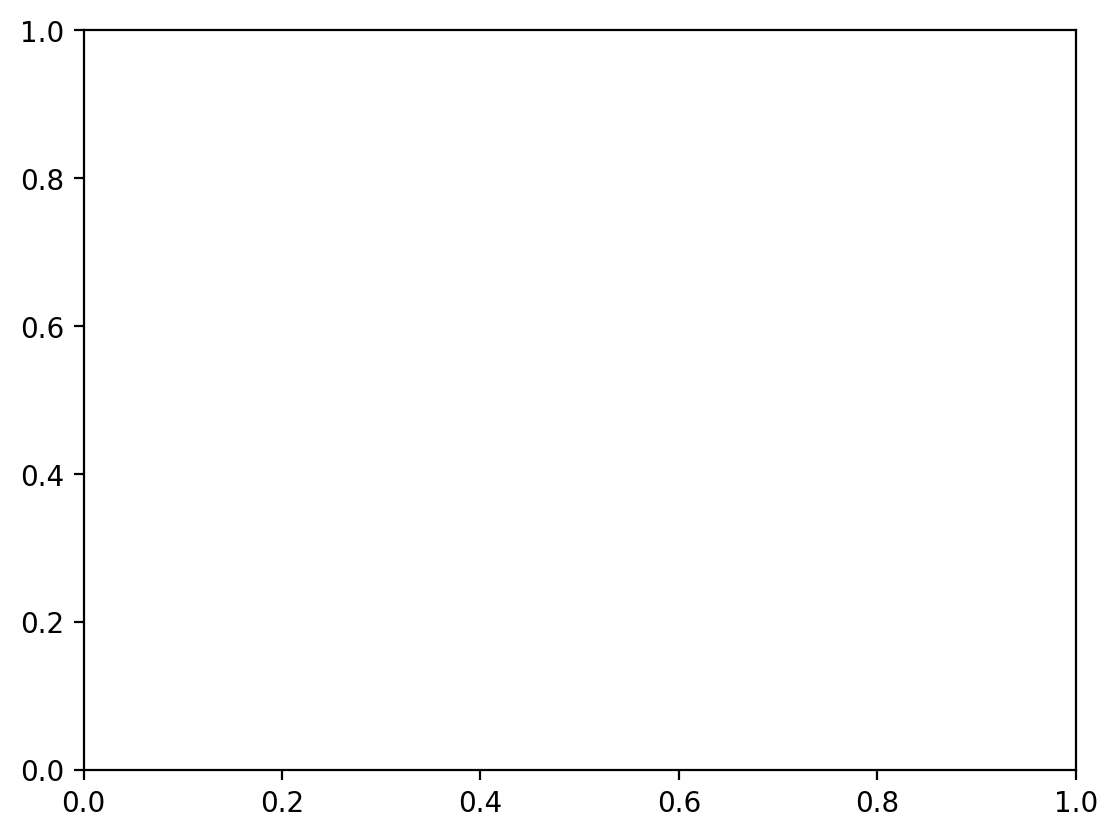

In [13]:
fig, ax = plt.subplots()
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

Y_CN = 1.3587076221093417 * e^(0.06277672312535107 * x) 
Y_CI = 2.759026984478504 * e^(0.0541279031722064 * x) 
Y _CI-AD= 2.8548388205623088 * e^(0.049266399152033014 * x) 


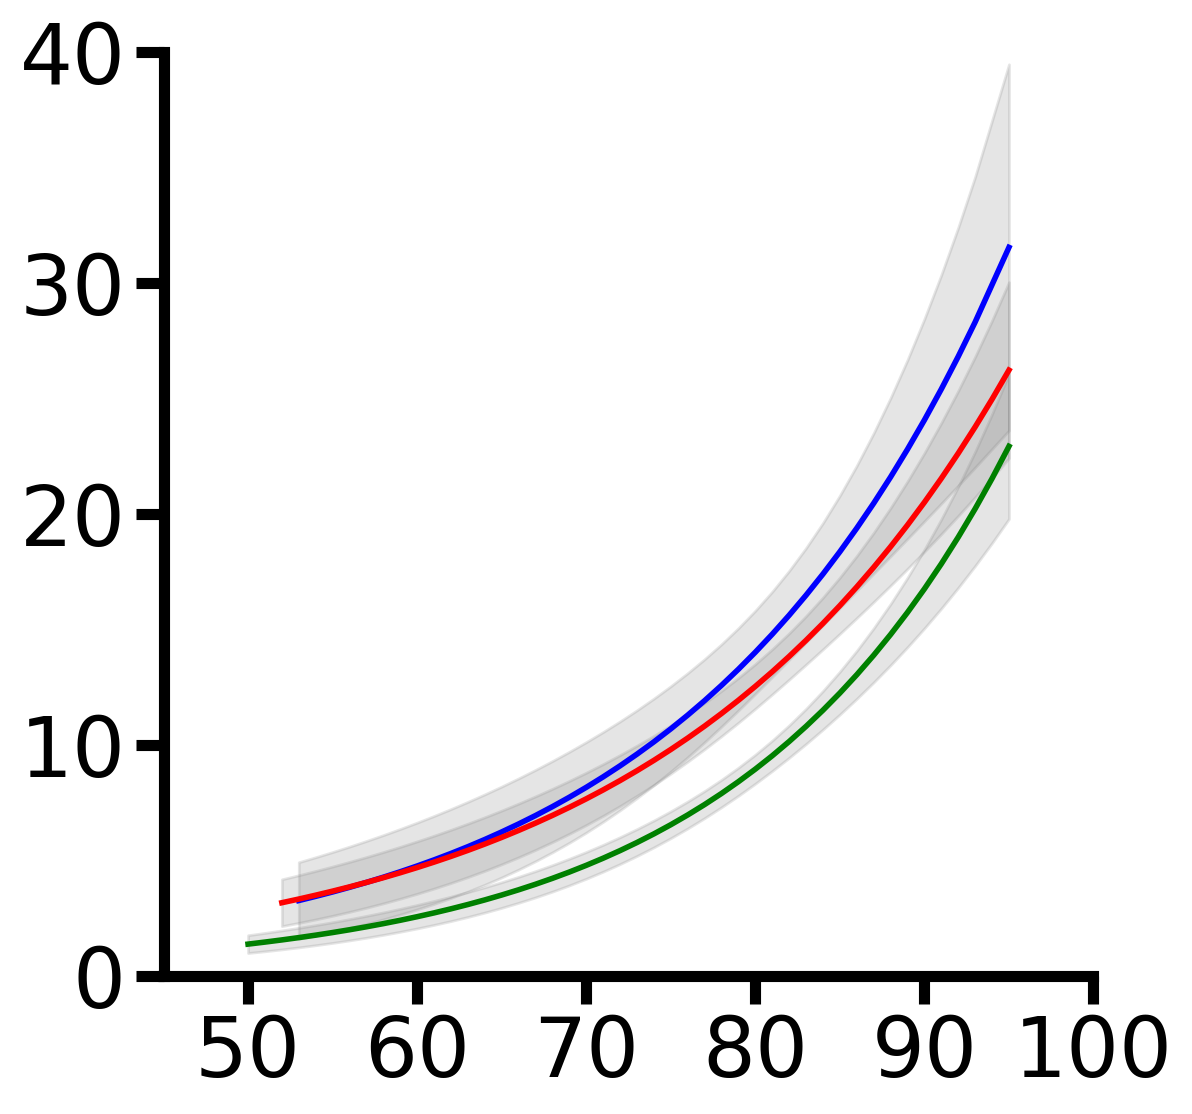

In [14]:
# plotting Exponential graph for CN, CI and CI-AD together

plt.figure(figsize=(6, 6))

plt.fill_between(x_CN[ix0], upper0[ix0], lower0[ix0], color='gray', alpha=0.2)
plt.plot(x_CN[ix0], yhat0[ix0], c='g' , lw=2 )

plt.fill_between(x_CI[ix1], upper1[ix1], lower1[ix1], color='gray', alpha=0.2)
plt.plot(x_CI[ix1], yhat1[ix1], c='b' , lw=2 )

plt.fill_between(x_AD[ix2], upper2[ix2], lower2[ix2], color='gray', alpha=0.2)
plt.plot(x_AD[ix2], yhat2[ix2], c='r' , lw=2 )
# plt.show()

# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False

       
ax = plt.gca()
ax.tick_params(axis="both", which='major', labelsize=30 )
plt.legend([],[], frameon = False)

plt.ylim(0,40)
plt.xlim(45,100)
ax.set_xticks(np.arange(50,101 , 10))

#ax.set_yticks(np.arange(500, 651, 30))
ax.xaxis.set_tick_params(width=4, length=10)
ax.yaxis.set_tick_params(width=4, length=10)

ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
plt.legend([],[], frameon = False)

plt.rcParams["font.family"] = "Arial"
# rc('text', usetex=True)
rc('axes', linewidth=3)
rc('font', weight='normal')
print(f"Y_CN = {a0} * e^({b0} * x) ")
print(f"Y_CI = {a1} * e^({b1} * x) ")
print(f"Y _CI-AD= {a2} * e^({b2} * x) ")


# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
       
# path = r'D:/NACC_NIRAJ'
# #path where we want to save the image 
       
# i =" log_WMH_ad_95.tiff" 
#     # add .tiff at the end of the file name to save as tiff
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()
